<a href="https://colab.research.google.com/github/codedyasai/Python_Intermediate/blob/main/11_%EA%B3%BC%EC%A0%9Cdrinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 개별함수 생성

In [ ]:
def gradient_colors(start_hex, end_hex, n=10):
    # HEX에서 RGB로 변환
    start_rgb = np.array([int(start_hex[i:i+2], 16) for i in (1, 3, 5)])
    end_rgb = np.array([int(end_hex[i:i+2], 16) for i in (1, 3, 5)])

    # RGB 그라데이션 계산
    diff_rgb = end_rgb - start_rgb
    gradient_rgb_list = [np.round(start_rgb + (diff_rgb * i/(n-1))).astype(int) for i in range(n)]

    # RGB에서 HEX로 변환하여 반환
    return ['#{:02x}{:02x}{:02x}'.format(*rgb) for rgb in gradient_rgb_list]


# 파일 불러오기

In [ ]:
drinks = pd.read_csv('drinks.csv')

In [ ]:
drinks.columns = ['country','beer','spirit','wine','total','continent']
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    193 non-null    object 
 1   beer       193 non-null    int64  
 2   spirit     193 non-null    int64  
 3   wine       193 non-null    int64  
 4   total      193 non-null    float64
 5   continent  193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


# 인사이트 탐색

## 1. 어떤 나라가 알코올 소비량이 가장 높은지 알아볼 수 있다.

In [ ]:
total = drinks.sort_values(by='total', ascending=False)
beer = drinks.sort_values(by='beer', ascending=False)
spirit = drinks.sort_values(by='spirit', ascending=False)
wine = drinks.sort_values(by='wine', ascending=False)

In [ ]:
total

,country,beer,spirit,wine,total,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,OT
45,Czech Republic,361,170,134,11.8,EU
...,...,...,...,...,...,...
79,Iran,0,0,0,0.0,AS
90,Kuwait,0,0,0,0.0,AS
128,Pakistan,0,0,0,0.0,AS
97,Libya,0,0,0,0.0,AF


In [ ]:
total.country[:10]
beer
spirit
wine

,country,beer,spirit,wine,total,continent
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU
3,Andorra,245,138,312,12.4,EU
166,Switzerland,185,100,280,10.2,EU
48,Denmark,224,81,278,10.4,EU
...,...,...,...,...,...,...
79,Iran,0,0,0,0.0,AS
161,Sri Lanka,16,104,0,2.2,AS
128,Pakistan,0,0,0,0.0,AS
78,Indonesia,5,1,0,0.1,AS


In [ ]:
print('순수 알코올 소비가 가장 많은 국가 : ',total.iloc[0,0])
print('맥주 소비가 가장 많은 국가 : ',beer.iloc[0,0])
print('증류주 소비가 가장 많은 국가 : ',spirit.iloc[0,0])
print('와인 소비가 가장 많은 국가 : ',wine.iloc[0,0])

순수 알코올 소비가 가장 많은 국가 :  Belarus
맥주 소비가 가장 많은 국가 :  Namibia
증류주 소비가 가장 많은 국가 :  Grenada
와인 소비가 가장 많은 국가 :  France


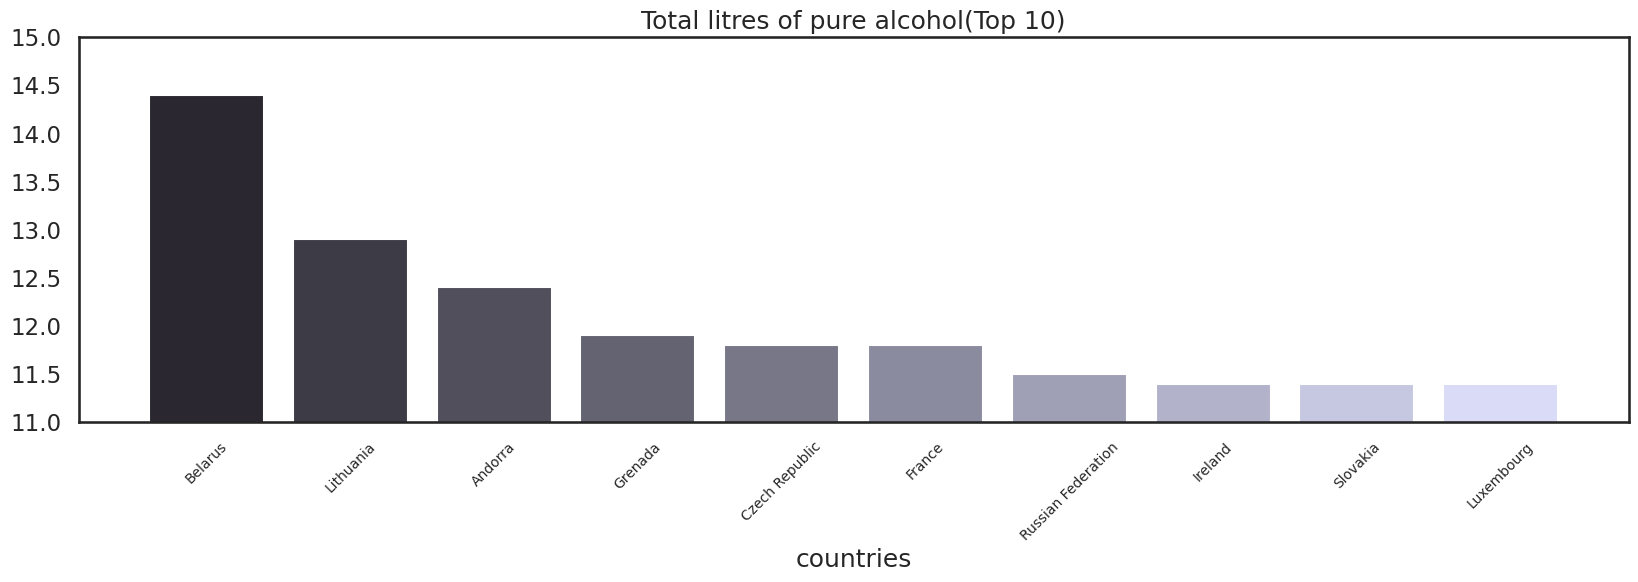

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

x = total.country[:10]
y = total.total[:10]
bar_labels = total.country
bar_colors = gradient_colors("#2A2730", "#D9DBF7", len(x))

ax.bar(x, y, color=bar_colors)
ax.set_title('Total litres of pure alcohol(Top 10)')
ax.set_ylim(11, 15)
ax.set_xlabel('countries')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=10, rotation=45)

plt.show()

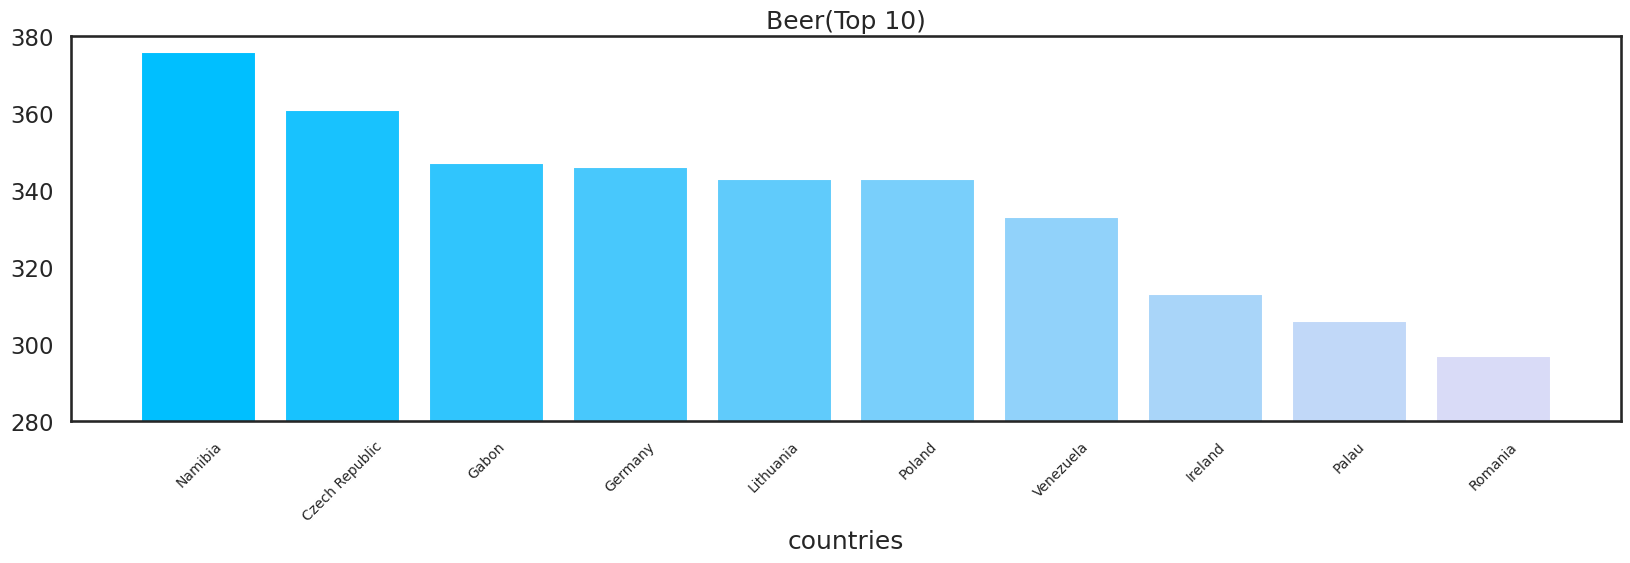

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

x = beer.country[:10]
y = beer.beer[:10]
bar_labels = beer.country
bar_colors = gradient_colors("#00BFFF", "#D9DBF7", len(x))

ax.bar(x, y, color=bar_colors)
ax.set_title('Beer(Top 10)')
ax.set_ylim(280, 380)
ax.set_xlabel('countries')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=10, rotation=45)

plt.show()

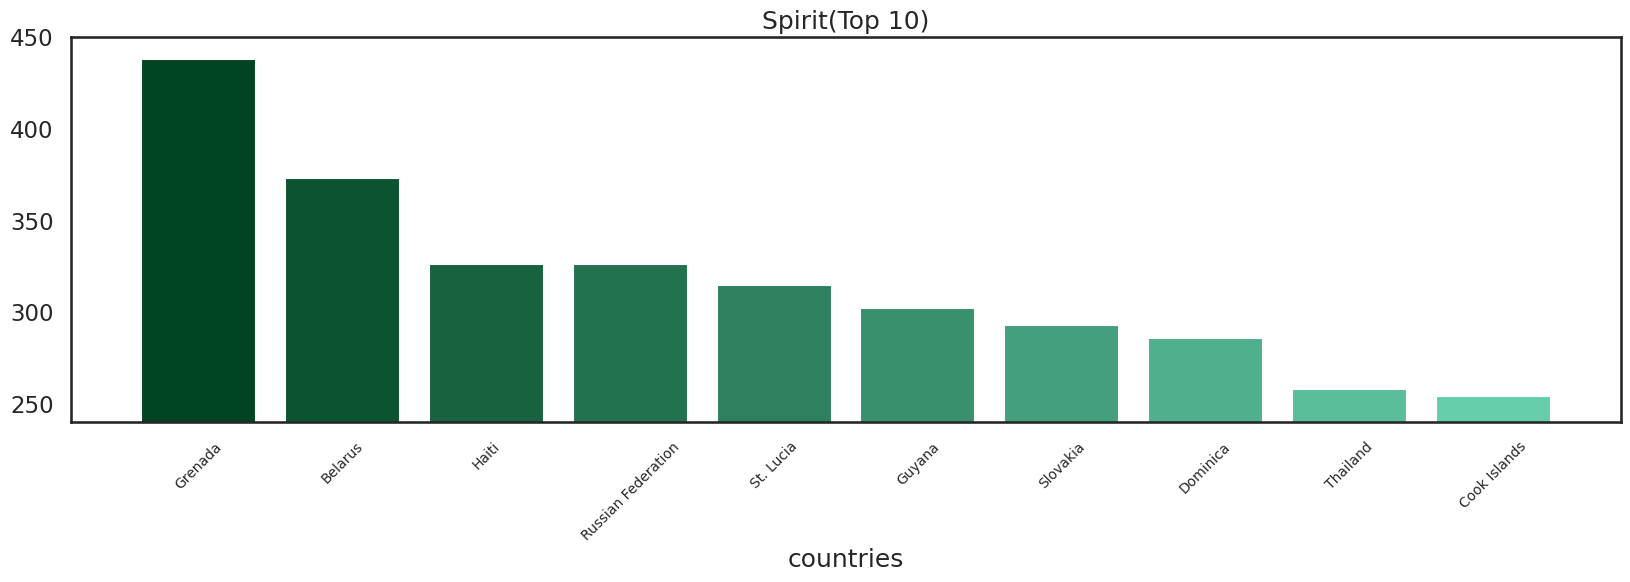

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

x = spirit.country[:10]
y = spirit.spirit[:10]
bar_labels = spirit.country
bar_colors = gradient_colors("#014421", "#66CDAA", len(x))

ax.bar(x, y, color=bar_colors)
ax.set_title('Spirit(Top 10)')
ax.set_ylim(240, 450)
ax.set_xlabel('countries')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=10, rotation=45)

plt.show()

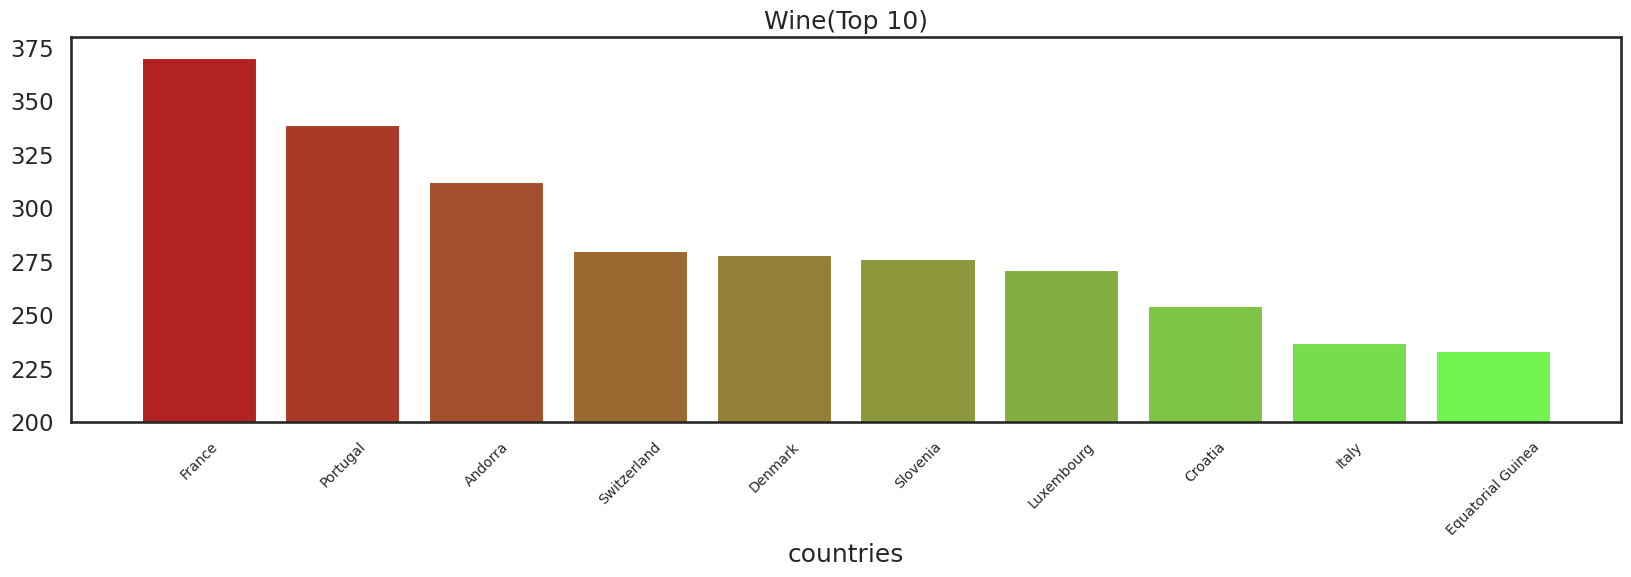

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

x = wine.country[:10]
y = wine.wine[:10]
bar_labels = wine.country
bar_colors = gradient_colors("#B22222", "#6FF4500", len(x))

ax.bar(x, y, color=bar_colors)
ax.set_title('Wine(Top 10)')
ax.set_ylim(200, 380)
ax.set_xlabel('countries')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, fontsize=10, rotation=45)

plt.show()

## 2. 어떤 대륙이 알코올 소비량이 가장 높은지 알아볼 수 있다.

In [ ]:
conti = drinks.groupby('continent').sum().sort_values(by='total', ascending=False)

<ipython-input-145-96d571a0fc9d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  conti = drinks.groupby('continent').sum().sort_values(by='total', ascending=False)


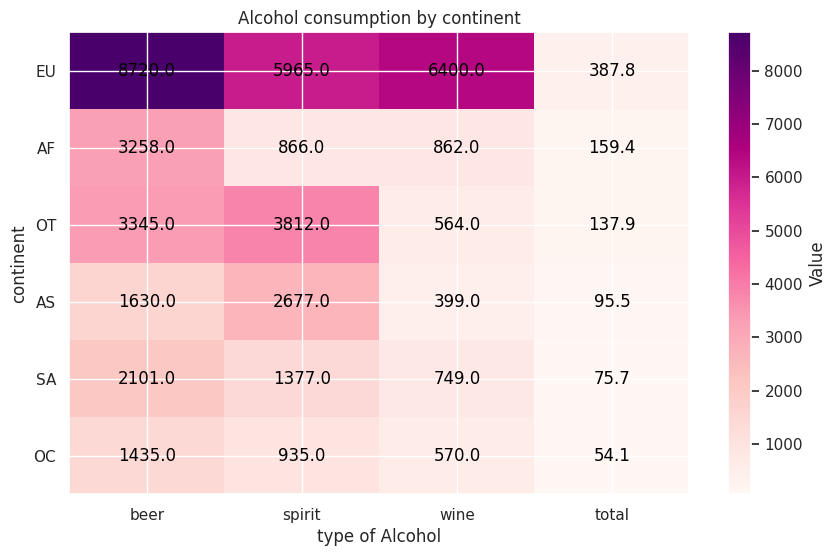

In [ ]:
continents = conti.index
atype = conti.columns

plt.figure(figsize=(10, 6))
plt.imshow(conti.values, cmap="RdPu", aspect="auto", interpolation="none")
plt.colorbar(label="Value")

plt.xticks(np.arange(len(atype)), atype)
plt.yticks(np.arange(len(continents)), continents)

for i in range(len(continents)):
    for j in range(len(atype)):
        plt.text(j, i, f"{conti.values[i, j]:.1f}", ha="center", va="center", color="black")

plt.title("Alcohol consumption by continent")
plt.xlabel("type of Alcohol")
plt.ylabel("continent")

plt.show()

In [ ]:
round(drinks.groupby('continent').describe(), 1)

beer                                                spirit         \
          count   mean   std   min    25%    50%    75%    max  count   mean   
continent                                                                      
AF         53.0   61.5  80.6   0.0   15.0   32.0   76.0  376.0   53.0   16.3   
AS         44.0   37.0  49.5   0.0    4.2   17.5   60.5  247.0   44.0   60.8   
EU         45.0  193.8  99.6   0.0  127.0  219.0  270.0  361.0   45.0  132.6   
OC         16.0   89.7  96.6   0.0   21.0   52.5  125.8  306.0   16.0   58.4   
OT         23.0  145.4  79.6   1.0   80.0  143.0  198.0  285.0   23.0  165.7   
SA         12.0  175.1  65.2  93.0  129.5  162.5  198.0  333.0   12.0  114.8   

           ...   wine        total                                        
           ...    75%    max count mean  std  min  25%   50%   75%   max  
continent  ...                                                            
AF         ...   13.0  233.0  53.0  3.0  2.6  0.0  0.7   2.3   4.7   9.1  
AS         ...    8.0  123.0  44.0  2.2  2.8  0.0  0.1   1.2   2.4  11.5  
EU         ...  195.0  370.0  45.0  8.6  3.4  0.0  6.6  10.0  10.9  14.4  
OC         ...   23.2  212.0  16.0  3.4  3.3  0.0  1.0   1.8   6.2  10.4  
OT         ...   34.0  100.0  23.0  6.0  2.4  2.2  4.3   6.3   7.0  11.9  
SA         ...   98.5  221.0  12.0  6.3  1.5  3.8  5.2   6.8   7.4   8.3  

[6 rows x 32 columns]

## 3. 대한민국의 알코올 소비패턴을 분석할 수 있다.

- South Korea

In [ ]:
drinks[drinks.country == 'South Korea']

,country,beer,spirit,wine,total,continent
138,South Korea,140,16,9,9.8,AS


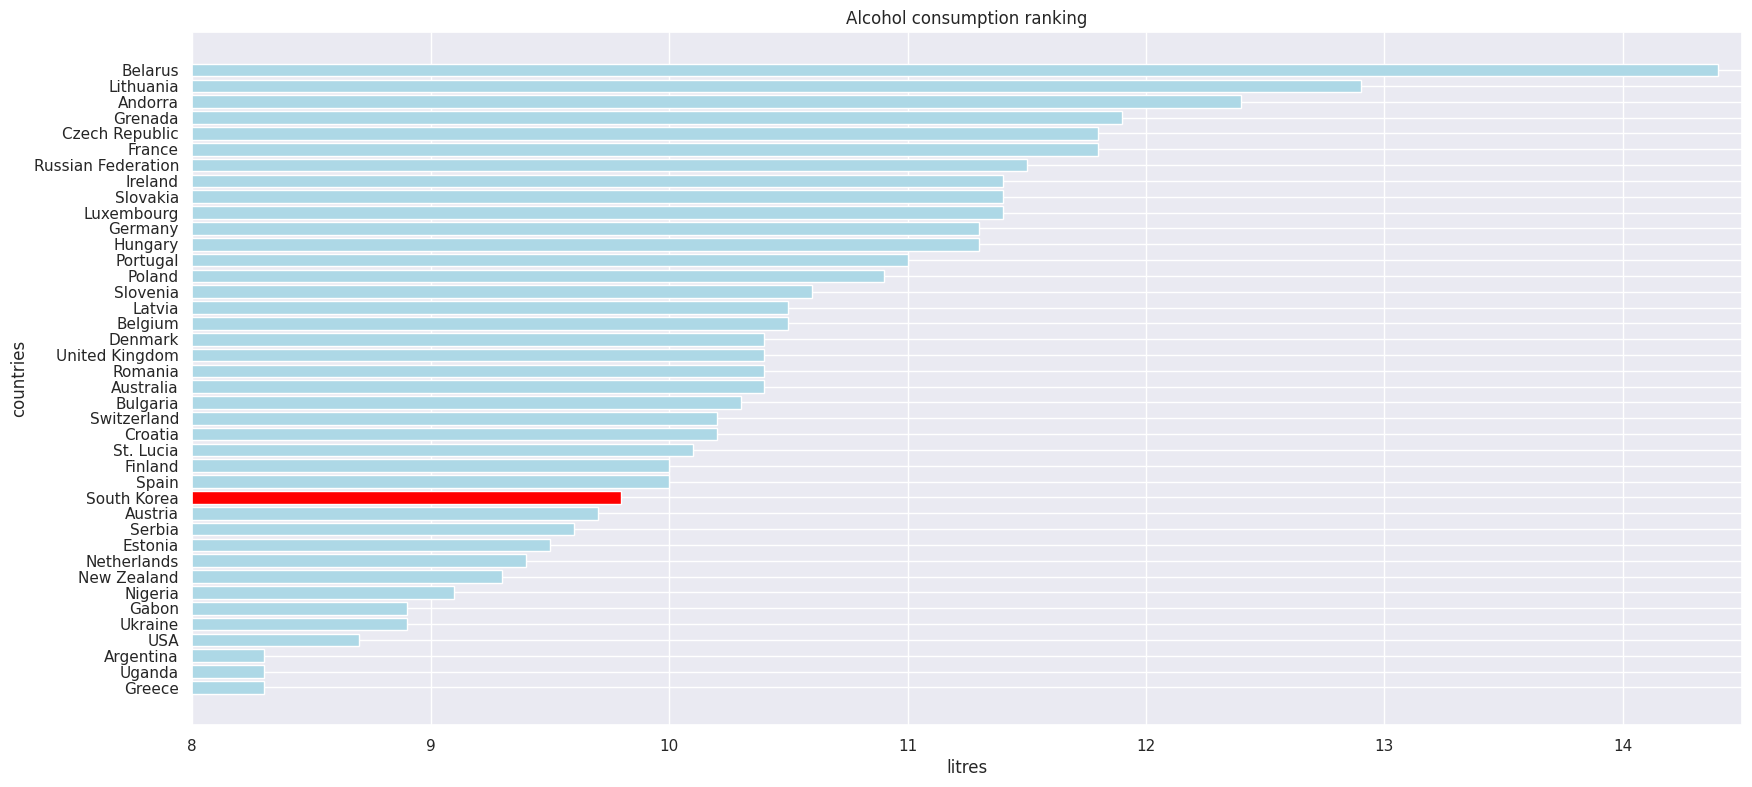

In [ ]:
# 전세계에서 알콜 소비 순위
c = total.country[:40]
t = total.total[:40]

highlight_index = 27
colors = ["lightblue" if i != highlight_index else "red" for i in range(len(c))]

plt.figure(figsize=(20,9))
bars = plt.barh(c[::-1], t[::-1], color=colors[::-1])
plt.xlim(8, 14.5)
plt.title("Alcohol consumption ranking")
plt.xlabel("litres")
plt.ylabel("countries")

plt.show()

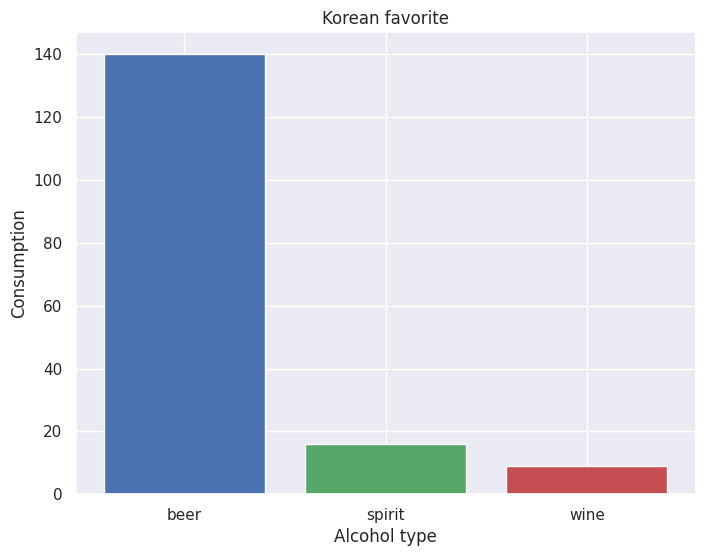

In [ ]:
# 한국 사람들이 가장 좋아하는 술은?
korea = drinks[drinks.country == 'South Korea']
alcohol_data = korea[["beer", "spirit", "wine"]]

plt.figure(figsize=(8, 6))
plt.bar(range(len(alcohol_data.columns)), alcohol_data.values[0], tick_label=alcohol_data.columns, color=['b', 'g', 'r'])

plt.title("Korean favorite")
plt.xlabel("Alcohol type")
plt.ylabel("Consumption")

plt.show()

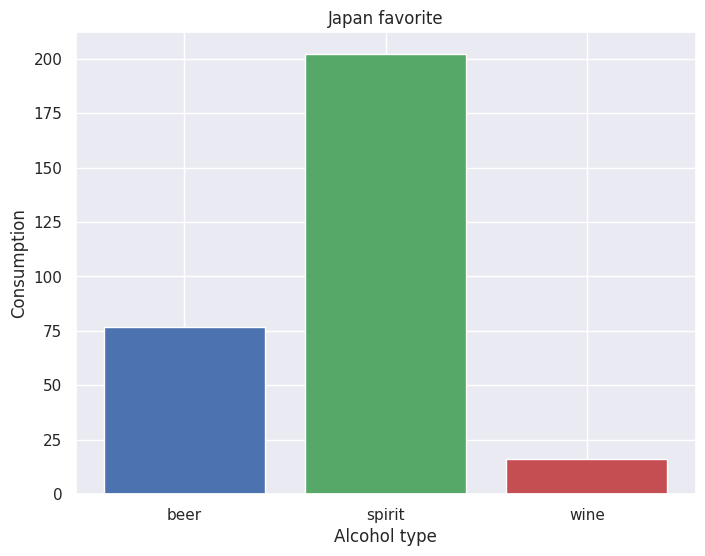

In [ ]:
# 일본 사람들이 가장 좋아하는 술은?
Japan = drinks[drinks.country == 'Japan']
alcohol_data = Japan[["beer", "spirit", "wine"]]

plt.figure(figsize=(8, 6))
plt.bar(range(len(alcohol_data.columns)), alcohol_data.values[0], tick_label=alcohol_data.columns, color=['b', 'g', 'r'])

plt.title("Japan favorite")
plt.xlabel("Alcohol type")
plt.ylabel("Consumption")

plt.show()

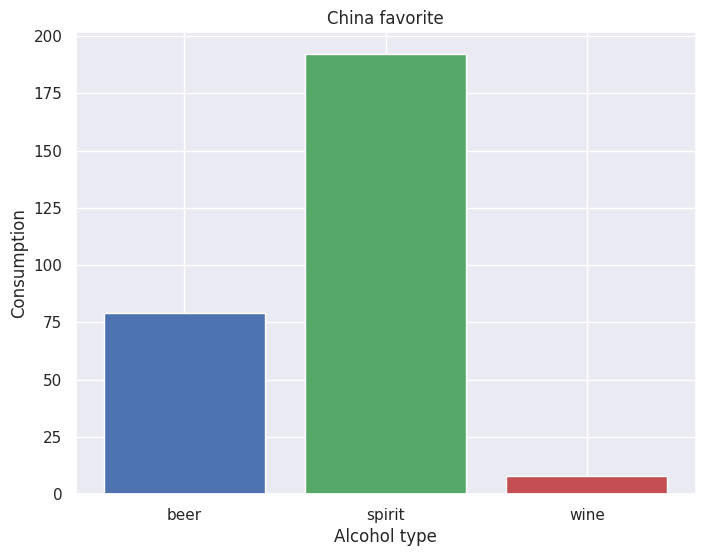

In [ ]:
# 중국 사람들이 가장 좋아하는 술은?
China = drinks[drinks.country == 'China']
alcohol_data = China[["beer", "spirit", "wine"]]

plt.figure(figsize=(8, 6))
plt.bar(range(len(alcohol_data.columns)), alcohol_data.values[0], tick_label=alcohol_data.columns, color=['b', 'g', 'r'])

plt.title("China favorite")
plt.xlabel("Alcohol type")
plt.ylabel("Consumption")

plt.show()

# 피쳐들간의 상관분석

In [ ]:
drinks.columns

Index(['country', 'beer', 'spirit', 'wine', 'total', 'continent'], dtype='object')

In [ ]:
# beer 와 wine 의 pearson
corr = drinks[['beer', 'wine']].corr(method= 'pearson')
corr

,beer,wine
beer,1.000000,0.527172
wine,0.527172,1.000000


In [ ]:
# 여러 피처들간의 상관관계 분석
cols = ['beer', 'spirit', 'wine', 'total']
corr = drinks[cols].corr(method= 'pearson')
print(corr)

            beer    spirit      wine     total
beer    1.000000  0.458819  0.527172  0.835839
spirit  0.458819  1.000000  0.194797  0.654968
wine    0.527172  0.194797  1.000000  0.667598
total   0.835839  0.654968  0.667598  1.000000


In [ ]:
print(type(corr))

<class 'pandas.core.frame.DataFrame'>


- DataFrame(data, columns, index)

In [ ]:
import seaborn as sns

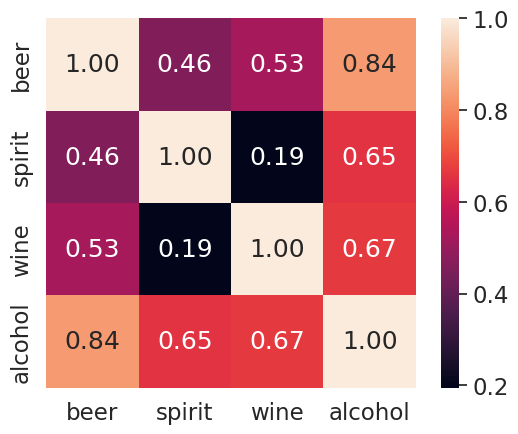

In [ ]:
# heatmap(히트맵): 피쳐들간의 상관계수를 시각화할때 가장 많이 이용되는 도구
# 상관행렬을 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale= 1.5)
hm = sns.heatmap(
    corr.values,
    cbar= True,
    annot= True,
    square = True,
    fmt = '.2f',
    yticklabels = cols_view,
    xticklabels = cols_view,
)


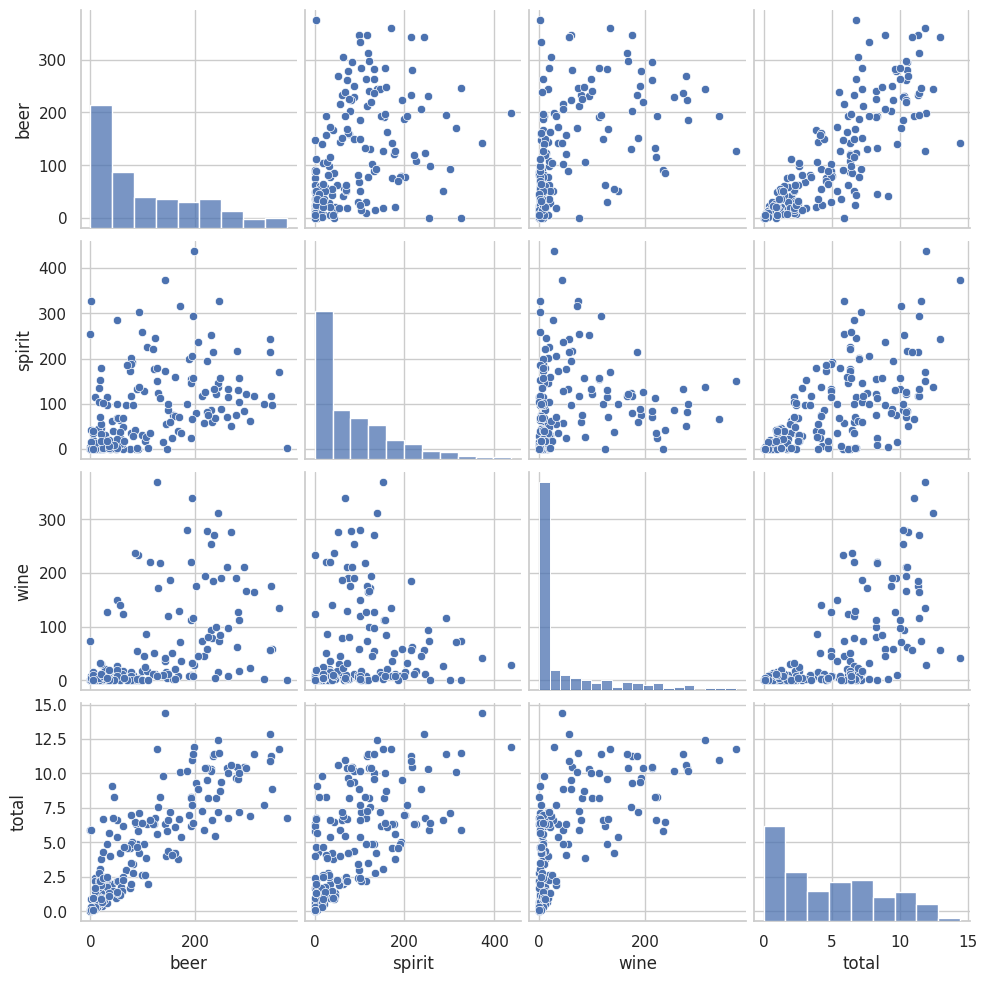

In [ ]:
# scatter plot(산점도, 산포도)
# pairplot: 여러 피처들간의 산점도 그래프를 그려주는 시각화 도구
sns.set(style= 'whitegrid')
sns.pairplot(drinks[['beer', 'spirit', 'wine', 'total']], height= 2.5)

plt.show()


### 대륙별 국가 수 시각화
### 범주형 데이터의 빈도수를 시각화할때 파이차트를 보편적으로 사용


In [ ]:
# value_counts(): 개별 건수를 추출하는 메서드로 시리즈 객체에서 사용된다.
data = drinks['continent'].value_counts()
data

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [ ]:
labels = data.index.tolist()
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [ ]:
fact = data.values.tolist()
fact

[53, 45, 44, 23, 16, 12]

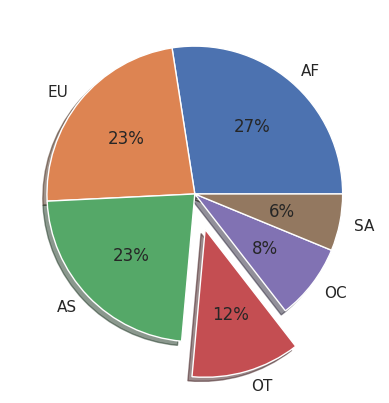

In [ ]:
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(fact, explode= explode, labels= labels, autopct= '%.0f%%', shadow= True)
plt.show()

### 대륙별 분석
- apply, agg

In [ ]:
# 대륙별 beer_servings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').beer.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345
SA,175.083333,93,333,2101


In [ ]:
# 전체 알코올 평균보다 더 많은 알코올을 섭취하는 대륙을 추출하시오.

alcohol_mean = drinks.total.mean()
print('전체 알코올 평균: ', alcohol_mean)

continent_mean = drinks.groupby('continent').total.mean()
print('대륙별 알코올 평균: ', continent_mean)

result = continent_mean[continent_mean > alcohol_mean]
print(result)

전체 알코올 평균:  4.717098445595855
대륙별 알코올 평균:  continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total, dtype: float64
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total, dtype: float64


In [ ]:
# 대륙별 beer의 평균 최소 최대 합계 시각화
result = drinks.groupby('continent').beer.agg(['mean','max', 'min', 'sum'])
result

,mean,max,min,sum
continent,,,,
AF,61.471698,376,0,3258
AS,37.045455,247,0,1630
EU,193.777778,361,0,8720
OC,89.687500,306,0,1435
OT,145.434783,285,1,3345
SA,175.083333,333,93,2101


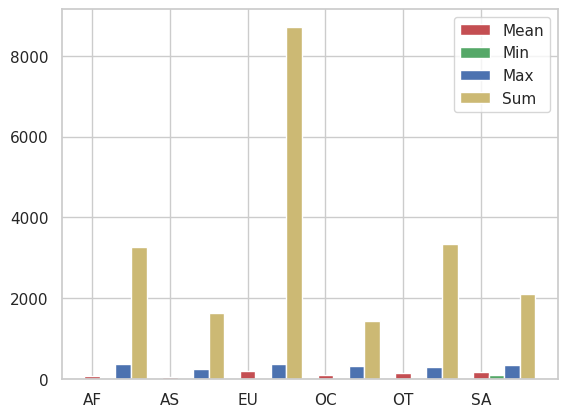

In [ ]:
means = result['mean'].tolist()
mins= result['min'].tolist()
maxs= result['max'].tolist()
sums= result['sum'].tolist()

n_groups= len(result.index)

index = np.arange(n_groups)

bar_width = 0.2
graph1= plt.bar(index, means, bar_width ,color = 'r', label='Mean')
graph2= plt.bar(index+bar_width, mins, bar_width, color='g', label='Min') #옆으로 이동할 크기가 bar_width. 안주면 다 같은 위치에 생김
graph3= plt.bar(index+bar_width * 2, maxs, bar_width, color='b', label='Max')
graph4= plt.bar(index+bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [ ]:
# 대륙별 알코올 소비량을 시각화하시오. 단, 마지막에 평균 알코올 소비량을 추가할 것
alcohol_mean = drinks.total.mean()
print('전체 알코올 평균: ', alcohol_mean)

continent_mean = drinks.groupby('continent').total.mean()
print('대륙별 알코올 평균: ', continent_mean)




전체 알코올 평균:  4.717098445595855
대륙별 알코올 평균:  continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total, dtype: float64


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumGothic')

In [ ]:
plt.rcParams['axes.unicode_minus']= False

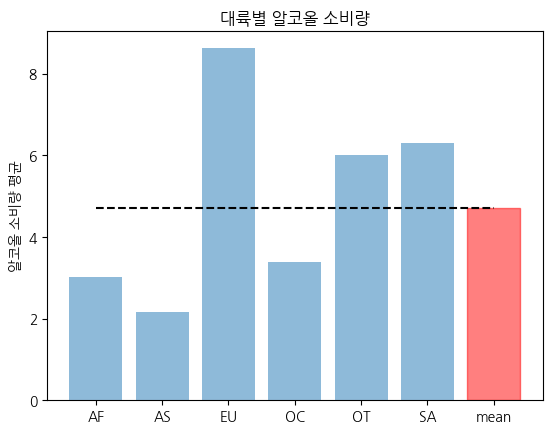

In [ ]:
continents = continent_mean.index.tolist()

continents.append('mean')

x_pos = np.arange(len(continents))

alcohol = continent_mean.tolist()

alcohol.append(alcohol_mean)

bar_list = plt.bar(x_pos, alcohol, align= 'center', alpha= 0.5)
bar_list[len(continents)-1].set_color('r')
plt.xticks(x_pos, continents)
plt.ylabel('알코올 소비량 평균')
plt.title('대륙별 알코올 소비량')

# plt.plot(시작위치, 마지막위치, 'k--')

plt.plot([0,6], [alcohol_mean, alcohol_mean],'k--')

plt.show()

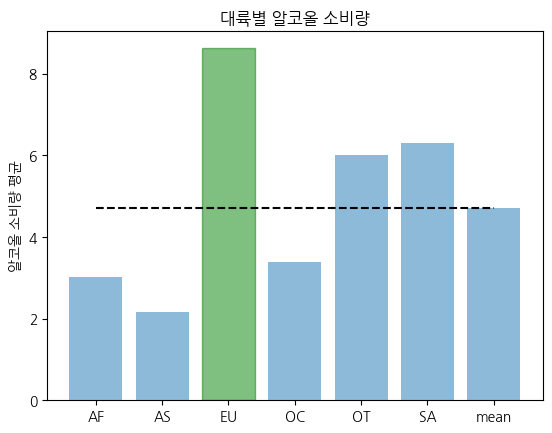

In [ ]:
# 가장 높은 대륙에 색상을 다르게 설정하시오.


continents = continent_mean.index.tolist()

continents.append('mean')

x_pos = np.arange(len(continents))

alcohol = continent_mean.tolist()

alcohol.append(alcohol_mean)

bar_list = plt.bar(x_pos, alcohol, align= 'center', alpha= 0.5)
bar_list[continents.index('EU')].set_color('g')
plt.xticks(x_pos, continents)
plt.ylabel('알코올 소비량 평균')
plt.title('대륙별 알코올 소비량')

# plt.plot(시작위치, 마지막위치, 'k--')

plt.plot([0,6], [alcohol_mean, alcohol_mean],'k--')

plt.show()

array([3.00754717, 2.17045455, 8.61777778, 3.38125   , 5.99565217,
       6.30833333, 4.71709845])